In [5]:
!pip install polars


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [6]:
import polars as pl
import pandas as pd
from datetime import datetime, timedelta

In [8]:
dataframe_pl=pl.DataFrame({
    'enter': [1,2,3],
    'date': [
        (datetime(2024,6,20)),
        (datetime(2024,7,13)),
        (datetime(2024,5,20))
    ]
})

In [9]:
print(dataframe_pl)

shape: (3, 2)
┌───────┬─────────────────────┐
│ enter ┆ date                │
│ ---   ┆ ---                 │
│ i64   ┆ datetime[μs]        │
╞═══════╪═════════════════════╡
│ 1     ┆ 2024-06-20 00:00:00 │
│ 2     ┆ 2024-07-13 00:00:00 │
│ 3     ┆ 2024-05-20 00:00:00 │
└───────┴─────────────────────┘


In [10]:
df_pl_orders=pl.read_csv('../Sesion2/data_retail/orders',separator='|',has_header=False,new_columns=['order_id','order_date','order_customer_id','order_status'])
print(df_pl_orders)

FileNotFoundError: No such file or directory (os error 2): ../Sesion2/data_retail/orders

In [5]:
df_pl_orders = pl.read_csv('../Sesion2/data_retail/orders', separator = '|', has_header=False, new_columns=['order_id', 'order_date', 'order_customer_id', 'order_status'])
print(df_pl_orders)
 

FileNotFoundError: No such file or directory (os error 2): ../Sesion2/data_retail/orders

In [6]:
df_pl_order_items = pl.read_csv('../Sesion2/data_retail/order_items',separator='|', has_header=False, new_columns=["order_item_id","order_item_order_id","order_item_product_id","order_item_quantity","order_item_subtotal","order_item_product_price"])
print(df_pl_order_items)

FileNotFoundError: No such file or directory (os error 2): ../Sesion2/data_retail/order_items

In [7]:
df_pl_orders.join(df_pl_order_items,left_on='order_id',right_on='order_item_order_id')


NameError: name 'df_pl_orders' is not defined

In [10]:
df_pl_orders.head()

NameError: name 'df_pl_orders' is not defined

In [ ]:
df_pl_orders.schema

In [ ]:
df_pl_orders.select('order_id')

In [ ]:
df_pl_orders.select(pl.col('order_id').sort()/1000)

In [ ]:
df_pl_orders.filter(pl.col('order_id') > 10)

In [ ]:
df_pl_order_items.group_by("order_item_order_id").agg(
    pl.mean("order_item_subtotal").alias("mean_subtotal")
)

In [ ]:
# OTRA COSA

In [11]:
import numpy as np


In [12]:
filas = 2000
rng = np.random.default_rng(seed=7)#seed semilla que da siempre los valores
data = {
    "precio": rng.exponential(scale=1000,size=filas),
    "anio" : rng.integers(low=1995,high=2024,size=filas),
    "tipo" : rng.choice(['A','B','C'],size=filas)
}

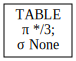

In [13]:
df_pl_lazy = pl.LazyFrame(data)
df_pl_lazy.show_graph()

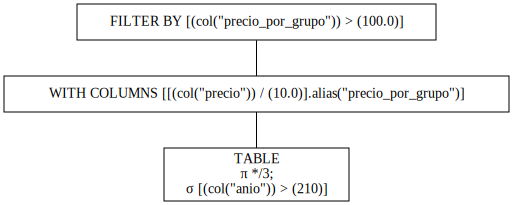

In [14]:
lazy_query = (
    df_pl_lazy
    .with_columns(
        (pl.col('precio') /10).alias('precio_por_grupo')
    )
    .filter(pl.col("precio_por_grupo")>100)
    .filter(pl.col("anio")>210)
)
lazy_query.show_graph()

In [15]:
print(lazy_query.explain())#imporme el plan de ejecucion, esto es un plan

FILTER [(col("precio_por_grupo")) > (100.0)] FROM
   WITH_COLUMNS:
   [[(col("precio")) / (10.0)].alias("precio_por_grupo")], [] 
    DF ["precio", "anio", "tipo"]; PROJECT */3 COLUMNS; SELECTION: [(col("anio")) > (210)]


In [16]:
lazy_query.collect()#esto es una accion

precio,anio,tipo,precio_por_grupo
f64,i64,str,f64
1025.203348,1998,"""C""",102.520335
3383.637351,2007,"""A""",338.363735
2809.215763,1998,"""B""",280.921576
1073.700662,2016,"""A""",107.370066
1884.250052,2014,"""B""",188.425005
…,…,…,…
2062.191584,2019,"""A""",206.219158
1114.290022,2015,"""B""",111.429002
1110.084266,1997,"""B""",111.008427


In [17]:
import requests
import pathlib#ruta de almacen de archivo

def descarga(url:str,file_path:pathlib.Path):
    response = requests.get(url)

    if response:
        file_path.write_bytes(response.content)
    else:
        print("Ocurrio un error")


In [18]:
url="https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
file_path=pathlib.Path("cars.csv")

descarga(url,file_path)

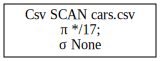

In [19]:
lazy_car = pl.scan_csv(file_path)
lazy_car.show_graph()

In [20]:
lazy_car.select(pl.col('State')).collect()

State
str
"""WA"""
"""WA"""
"""WA"""
"""WA"""
"""WA"""
…
"""WA"""
"""WA"""
"""WA"""


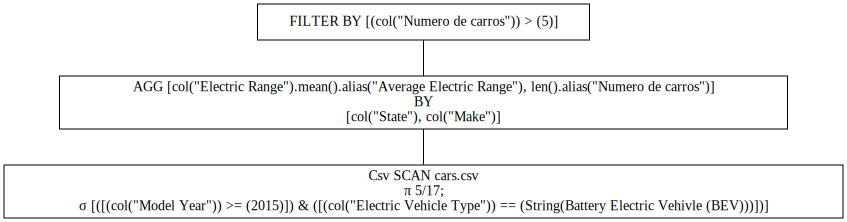

In [27]:
lazy_query= (
    lazy_car
    .filter(pl.col('Model Year')>=2015)
    .filter(pl.col('Electric Vehicle Type')=="Battery Electric Vehivle (BEV)")
    .group_by(['State','Make'])
    .agg(
        pl.mean("Electric Range").alias("Average Electric Range"),
        pl.len().alias("Numero de carros")
    )
    .filter(pl.col("Numero de carros")>5)
)
lazy_query.show_graph()

In [25]:
lazy_query.explain()

'FILTER [(col("Numero de carros")) > (5)] FROM\n  AGGREGATE\n  \t[col("Electric Range").mean().alias("Average Electric Range"), len().alias("Numero de carros")] BY [col("State"), col("Make")] FROM\n\n      Csv SCAN cars.csv\n      PROJECT 5/17 COLUMNS\n      SELECTION: [([(col("Model Year")) >= (2015)]) & ([(col("Electric Vehicle Type")) == (String(Battery Electric Vehivle (BEV)))])]'

In [26]:
lazy_query.collect()

State,Make,Average Electric Range,Numero de carros
str,str,f64,u32
